In [29]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting
import datetime as DT #Required to create SerDates for my hourly data

In [30]:
df = pd.read_csv('Woodlands_Piezometer.csv', header=0)
DateArray = df.as_matrix()
DateArray = DateArray[:,0:4].astype(int)
print(DateArray)
SerDates = [DT.datetime(*x) for x in DateArray]

df['SerDates'] = SerDates
#df


[[2013   10    1    0]
 [2013   10    1    1]
 [2013   10    1    2]
 ..., 
 [2017    9   30   21]
 [2017    9   30   22]
 [2017    9   30   23]]


In [39]:
# Use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q' (discharge)
# on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image
df.plot(df['SerDates'].values, y='DTW_m',figsize=(14,10))

In [32]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
DTW = df['DTW_m'].values

In [40]:
# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
DTWt   = DTW[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
DTWtm1 = DTW[0:-2]

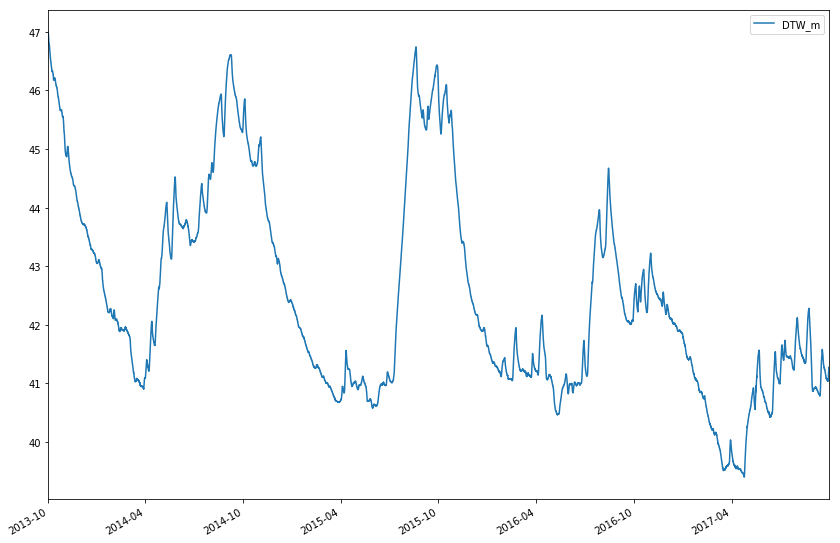

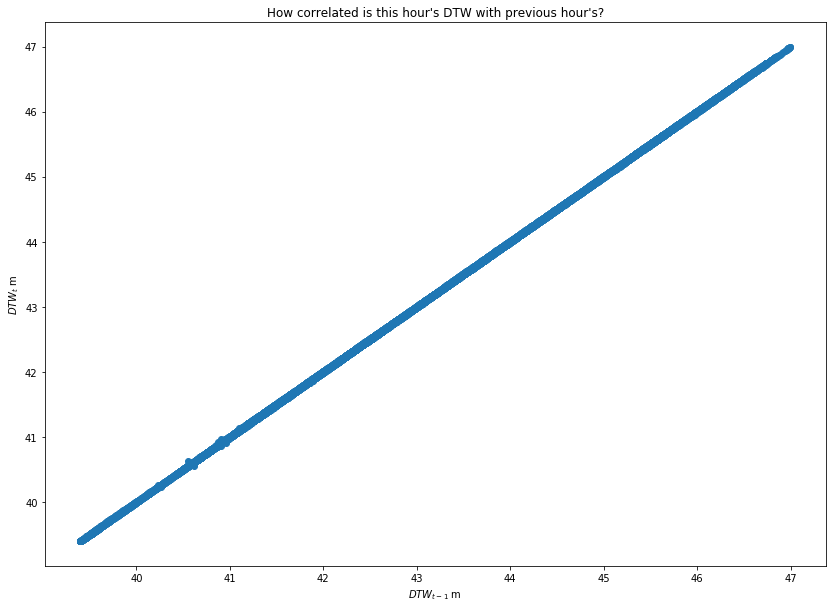

In [41]:
# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(DTWtm1,DTWt,'o')
plt.title('How correlated is this hour\'s DTW with previous hour\'s?')
plt.xlabel('$DTW_{t-1}$ m')
plt.ylabel('$DTW_t$ m')
plt.show()

#5. Save the dataframe as a pandas "pickle" file¶

df.to_pickle('WoodlandsDTW_WY2013-2017.pkl')